## **Searching keywords in SCOPUS API by years**

We search for literature with the Scopus API via URL requests. To do the Scopus searches in this notebook (which is optional), you need an API key. https://dev.elsevier.com/. Once you get a key, add it to the file config.json

In [2]:
import sys
sys.path.append('your_folder')

from division import divisions
from utils import make_df, make_request, get_all_results


In [3]:
import requests
import json
import urllib
import pandas as pd
import numpy as np

from division import divisions
from utils import make_df, make_request, get_all_results

# Load configuration, this should contain your API Key
con_file = open("/your_input/config.json")
config = json.load(con_file)
con_file.close()

*ml_terms here is a datalist which you can change, add_in depended on your requirement*

In [4]:
ml_terms = [['Xgboost'],['naive bayes'],['bayesian network*'],['genetic algorithm*'],['particle swarm'],['decision tree*'],
           ['random forest*'],['neural network*'],['back propagation','machine learning'],['feedforward'],['nearest neigh*','machine learning'],['support vector*'],
           ['regression','machine learning'],['gaussian process','kriging'],['deep learning'],['AI','artificial inteligence'],['CNN*'],['GNN*'],['Transformer*'],['autoencoder'],['de novo','deep learning','machine learning'],['Graph-based'],
           ['regression','deep learning'],['diffusion model'],['machine learning']]

In [5]:
def make_query_string(keywords,boolop="OR",search_code="TITLE-ABS-KEY"):
    """
    Creates a Scopus query string used to search for ANY/ALL
    keyword(s) from a list of keywords in a document's title, abstract, or 
    keyword list using the search code: "TITLE-ABS-KEY"
    """
    qstring = ''
    for i in range(len(keywords)):
        
        if i != len(keywords) - 1:
            qstring += f'\"{keywords[i]}\"' + f' {boolop} '
        
        else:
            qstring += f'\"{keywords[i]}\"'

    qstring = search_code + "(" + qstring + ")"
    
    return qstring

In [6]:
import sys
import importlib

sys.path.append('your_folder')  

import division
importlib.reload(division)  
from division import divisions

# Test
print(divisions.keys())


dict_keys(['BioChem', 'ChemInfo', 'ChemTox', 'ComChem', 'MediChem', 'OrgChem'])


*Searching process*

In [7]:
columns = list(range(2015, 2026)) # 2015 to 2026-1
df = pd.DataFrame(columns=columns)
df.index = pd.MultiIndex.from_tuples([], names=["division", "term"])
results = {}
years = columns
for year in years:
    for acronym in divisions:
        
        division_dict = results.get(acronym, {})  # save results
        
        for term in ml_terms:

            keywords = divisions[acronym]['keywords']
            plain_query = make_query_string(keywords)
            
            # Conditions for ml_terms
            if term[-1] in ['machine learning', 'deep learning']:
                plain_query += " AND " + make_query_string(term, "AND")
            else:
                plain_query += " AND " + make_query_string(term)
            
            # Conditions for years
            plain_query += f" AND PUBYEAR IS {year}"
            
            request = make_request(plain_query, config['apikey'])
            num_results = int(request['search-results'].get('opensearch:totalResults', 0))
            print(acronym, term[0], year, num_results)
            
            if (acronym, term[0]) not in df.index:
            # Create a new row with NaN values
                new_row = pd.Series(index=df.columns, dtype='int64')
                new_row.name = (acronym, term[0])
                df = pd.concat([df, new_row.to_frame().T])

            df.at[(acronym, term[0]), year] = num_results
        
        results[acronym] = division_dict


BioChem Xgboost 2015 0
BioChem naive bayes 2015 10
BioChem bayesian network* 2015 19
BioChem genetic algorithm* 2015 85
BioChem particle swarm 2015 5
BioChem decision tree* 2015 40
BioChem random forest* 2015 52
BioChem neural network* 2015 78
BioChem back propagation 2015 3
BioChem feedforward 2015 7
BioChem nearest neigh* 2015 15
BioChem support vector* 2015 109
BioChem regression 2015 26
BioChem gaussian process 2015 3
BioChem deep learning 2015 10
BioChem AI 2015 40
BioChem CNN* 2015 3
BioChem GNN* 2015 5
BioChem Transformer* 2015 4
BioChem autoencoder 2015 0
BioChem de novo 2015 0
BioChem Graph-based 2015 7
BioChem regression 2015 2
BioChem diffusion model 2015 2
BioChem machine learning 2015 174
ChemInfo Xgboost 2015 0
ChemInfo naive bayes 2015 11
ChemInfo bayesian network* 2015 11
ChemInfo genetic algorithm* 2015 51
ChemInfo particle swarm 2015 8
ChemInfo decision tree* 2015 37
ChemInfo random forest* 2015 49
ChemInfo neural network* 2015 69
ChemInfo back propagation 2015 3
Chem

In [8]:
df.to_csv('search_results.csv')

In [9]:
with open('search_results.json','w') as out:
    json.dump(results,out)

In [10]:
df = pd.read_csv('search_results.csv')

In [11]:
df.head(100)

,Unnamed: 0.1,Unnamed: 0,Unnamed: 1,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,0,BioChem,Xgboost,0,3,3,4,9,12,22,27,37,60,42
1,1,BioChem,naive bayes,10,7,8,10,14,8,13,16,15,20,8
2,2,BioChem,bayesian network*,19,14,14,11,23,15,27,28,26,22,9
3,3,BioChem,genetic algorithm*,85,83,60,73,77,78,91,98,94,123,47
4,4,BioChem,particle swarm,5,11,11,7,9,10,5,15,8,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,ComChem,machine learning,297,349,457,718,1064,1422,2002,2403,3100,4553,2303
96,96,MediChem,Xgboost,0,3,3,9,24,50,79,131,180,346,235
97,97,MediChem,naive bayes,16,21,19,31,45,40,65,40,61,71,33
98,98,MediChem,bayesian network*,86,67,63,65,111,119,151,170,169,161,61


*Plot visualization*

- Total ML/DL terms occurrences across divisions related to drugs & chemicals

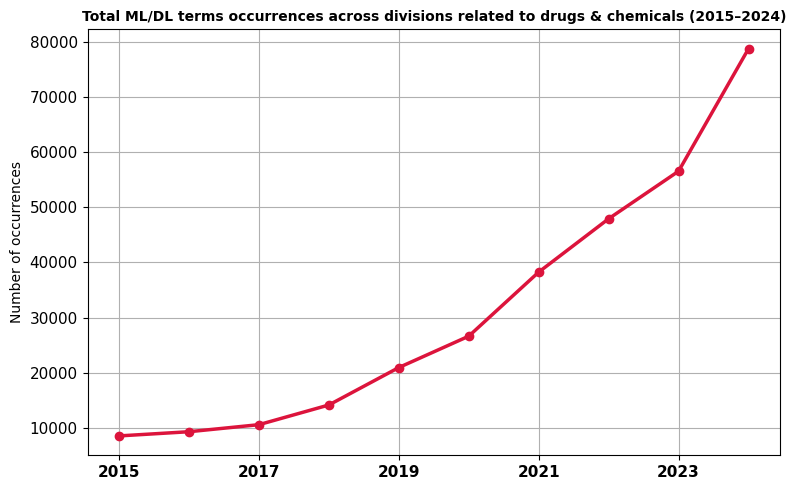

In [13]:
year_columns = [str(y) for y in range(2015, 2025)]  # tạo list ['2015', '2016', ..., '2024']
df_total_by_year = df[year_columns].sum(axis=0)
 
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df_total_by_year.plot(marker='o', color='crimson', linewidth=2.5)
plt.title("Total ML/DL terms occurrences across divisions related to drugs & chemicals (2015–2024)", fontsize=10,
         fontweight='bold')
# Định dạng trục X (năm)
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11)
plt.ylabel("Number of occurrences")
plt.grid(True)
plt.tight_layout()
plt.savefig("lineplot.png", format='png', dpi=400)
plt.show()

- Heatmap (from 2020 to 2025)

In [14]:
df.columns = df.columns.astype(str)

In [15]:
target_years = [str(y) for y in range(2015, 2020)] 
df['sum_2015_2020'] = df[target_years].sum(axis=1)

In [16]:
heatmap_df_T = df.pivot(index='Unnamed: 1', columns='Unnamed: 0', values='sum_2015_2020')

# Ordering the terms
heatmap_df_T = heatmap_df_T.loc[heatmap_df_T.sum(axis=1).sort_values(ascending=False).index]

# Ordering the divisions
heatmap_df_T = heatmap_df_T.loc[:, heatmap_df_T.sum(axis=0).sort_values(ascending=True).index]

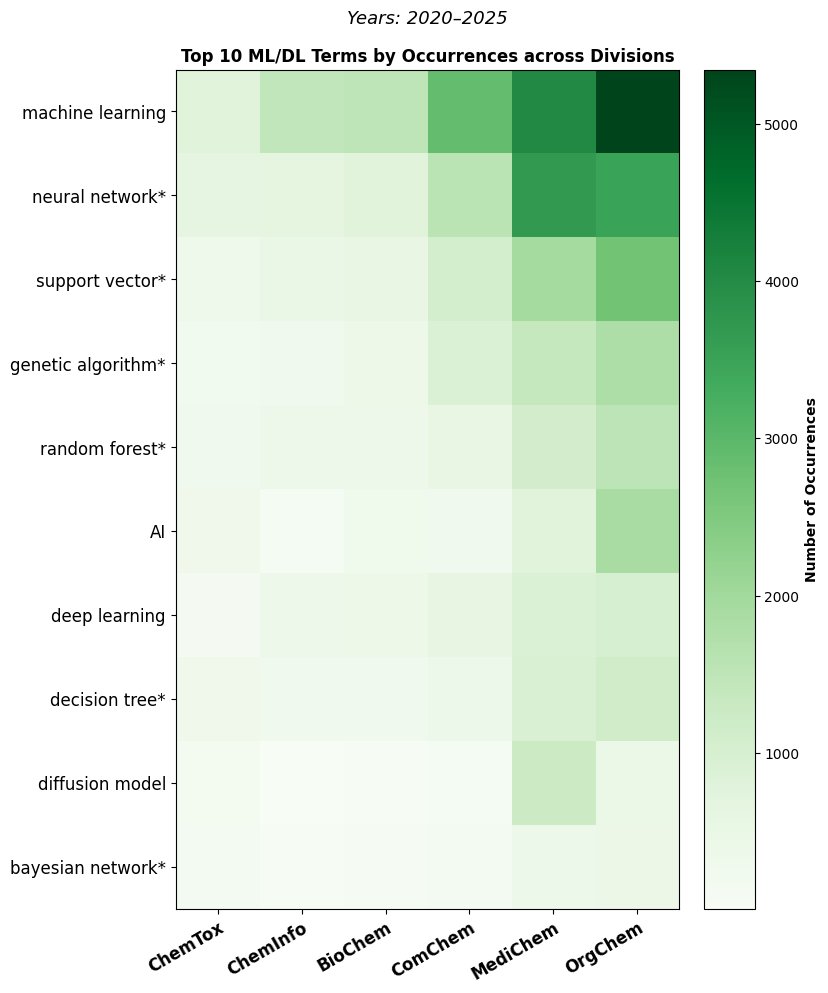

In [18]:
# **THÊM DÒNG NÀY: Taking top 10 divisions (rows) which have highest sum**
heatmap_df_T = heatmap_df_T.head(10)

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

data = heatmap_df_T.to_numpy()
ml_terms_formatted = heatmap_df_T.columns.tolist()
divisions = heatmap_df_T.index.tolist()

fig, ax = plt.subplots(figsize=[20,10])
im = ax.imshow(data, cmap='Greens', aspect='equal')

ax.set_xticks(np.arange(len(ml_terms_formatted)))
ax.set_yticks(np.arange(len(divisions)))
ax.set_xticklabels(ml_terms_formatted, fontweight='bold', fontsize=12)
ax.set_yticklabels(divisions, fontsize=12)

plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
plt.title("Top 10 ML/DL Terms by Occurrences across Divisions", fontsize=12, weight='bold')
ax.text(0.5, 1.05, "Years: 2015–2020", transform=ax.transAxes,
        ha="center", va="bottom", fontsize=13, fontstyle='italic')

# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.25)
cb = plt.colorbar(im, cax=cax)
cb.set_label(label='Number of Occurrences', weight='bold', size=10)

plt.tight_layout()
plt.savefig("heatmap_15_20_top10.png", format='png', dpi=300)
plt.show()

- Heatmap (from 2020-2025)

In [19]:
target_years_2 = [str(y) for y in range(2020, 2025)]
df['sum_2020_2025'] = df[target_years_2].sum(axis=1)

In [20]:
heatmap_df2_T = df.pivot(index='Unnamed: 1', columns='Unnamed: 0', values='sum_2020_2025')

heatmap_df2_T = heatmap_df2_T.loc[heatmap_df2_T.sum(axis=1).sort_values(ascending=False).index]

heatmap_df2_T = heatmap_df2_T.loc[:, heatmap_df2_T.sum(axis=0).sort_values(ascending=True).index]

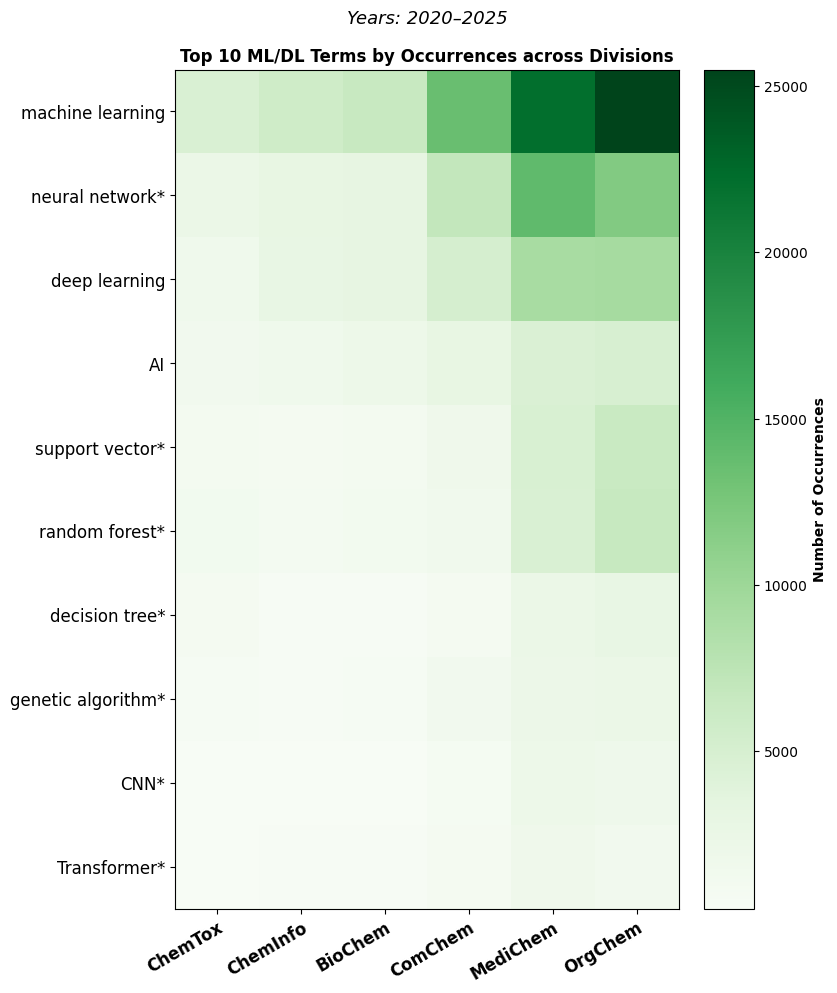

In [22]:
heatmap_df2_T = heatmap_df2_T.head(10)

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

data = heatmap_df2_T.to_numpy()
ml_terms_formatted = heatmap_df2_T.columns.tolist()
divisions = heatmap_df2_T.index.tolist()

fig, ax = plt.subplots(figsize=[20,10])
im = ax.imshow(data, cmap='Greens', aspect='equal')

ax.set_xticks(np.arange(len(ml_terms_formatted)))
ax.set_yticks(np.arange(len(divisions)))
ax.set_xticklabels(ml_terms_formatted, fontweight='bold', fontsize=12)
ax.set_yticklabels(divisions, fontsize=12)

plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
plt.title("Top 10 ML/DL Terms by Occurrences across Divisions", fontsize=12, weight='bold')
ax.text(0.5, 1.05, "Years: 2020–2025", transform=ax.transAxes,
        ha="center", va="bottom", fontsize=13, fontstyle='italic')

# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.25)
cb = plt.colorbar(im, cax=cax)
cb.set_label(label='Number of Occurrences', weight='bold', size=10)

plt.tight_layout()
plt.savefig("heatmap_20_25_top10.png", format='png', dpi=300)
plt.show()

- Heatmap (over the period 2015-2025)

In [23]:
target_years_all = [str(y) for y in range(2015, 2025)]
df['sum_2015_2025'] = df[target_years_all].sum(axis=1)

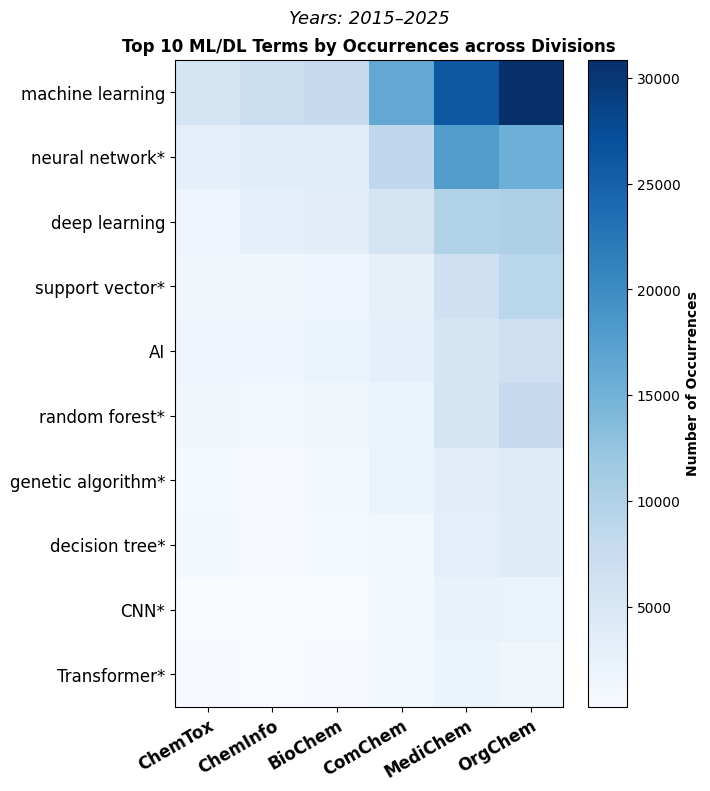

In [24]:
heatmap_df3_T = df.pivot(index='Unnamed: 1', columns='Unnamed: 0', values='sum_2015_2025')

heatmap_df3_T = heatmap_df3_T.loc[heatmap_df3_T.sum(axis=1).sort_values(ascending=False).index]

heatmap_df3_T = heatmap_df3_T.loc[:, heatmap_df3_T.sum(axis=0).sort_values(ascending=True).index]

heatmap_df3_T = heatmap_df3_T.head(10)

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

data = heatmap_df3_T.to_numpy()
ml_terms_formatted = heatmap_df3_T.columns.tolist()
divisions = heatmap_df3_T.index.tolist()

fig, ax = plt.subplots(figsize=[16,8])
im = ax.imshow(data, cmap='Blues', aspect='equal')

ax.set_xticks(np.arange(len(ml_terms_formatted)))
ax.set_yticks(np.arange(len(divisions)))
ax.set_xticklabels(ml_terms_formatted, fontweight='bold', fontsize=12)
ax.set_yticklabels(divisions, fontsize=12)

plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
plt.title("Top 10 ML/DL Terms by Occurrences across Divisions", fontsize=12, weight='bold')
ax.text(0.5, 1.05, "Years: 2015–2025", transform=ax.transAxes,
        ha="center", va="bottom", fontsize=13, fontstyle='italic')

# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.25)
cb = plt.colorbar(im, cax=cax)
cb.set_label(label='Number of Occurrences', weight='bold', size=10)

plt.tight_layout()
plt.savefig("heatmap_15_25_top10.png", format='png', dpi=300)
plt.show()